# How to use ROOT in a Jupyter notebook

The contents of this notebook were (incompletely!) copied from [here](https://root.cern.ch/notebooks/HowTos/HowTo_ROOT-Notebooks.html).

## Python flavour

In [1]:
import ROOT

Welcome to JupyROOT 6.26/00


In [2]:
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")

In [3]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()

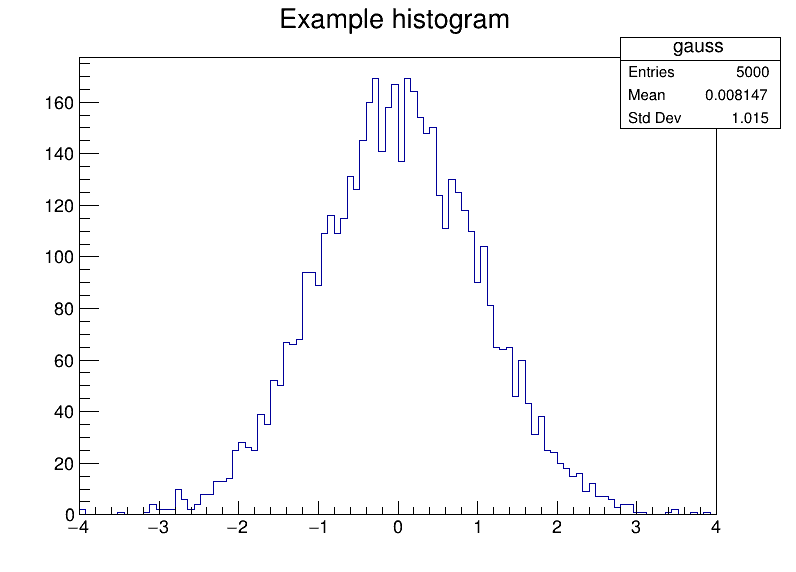

In [4]:
c.Draw()

In [5]:
%jsroot on
c.Draw()

## Interleave Python with C++: the `%%cpp` magic

In [6]:
%%cpp
cout << "This is a C++ cell" << endl;

This is a C++ cell


In [7]:
%%cpp
class A{
    public:
    A(){cout << "Constructor of A!" << endl;}
};

In [8]:
a = ROOT.A()

Constructor of A!


In [9]:
%%cpp
gauss->Fit("gaus", "S");
myCanvasName->Draw();

 FCN=65.0502 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=9.21369e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.57425e+02   2.76819e+00   8.89596e-03  -5.39870e-04
   2  Mean         1.38321e-02   1.43799e-02   5.69927e-05   8.22299e-04
   3  Sigma        1.00178e+00   1.04857e-02   1.11224e-05  -4.31183e-01


## The options of the `%%cpp` magic

In [10]:
%%cpp?

Docstring:
::

  %cpp [-a] [-d]

Executes the content of the cell as C++ code.

optional arguments:
  -a, --aclic    Compile code with ACLiC.
  -d, --declare  Declare functions and/or classes.
File:      ~/mambaforge/lib/python3.9/site-packages/JupyROOT/magics/cppmagic.py


In [11]:
%%cpp -a
class CompileMe {
public:
    CompileMe() {}
    void run() {}
};

Info in <TUnixSystem::ACLiC>: creating shared library /home/jpivarski/irishep/root-binder-test/960c6582_124741856764_C.so
Warning in cling::IncrementalParser::CheckABICompatibility():
  Possible C++ standard library mismatch, compiled with __GLIBCXX__ '20210408'
  Extraction of runtime standard library version was: '20220628'


In [12]:
ROOT.TClass.GetClass("CompileMe").HasDictionary()

True

In [13]:
ROOT.TClass.GetClass("A").HasDictionary()

False

In [14]:
%%cpp -d
void f() {
    cout << "This is function f" << endl;
}

In [16]:
print("This is again Python")
ROOT.f()

This is again Python
This is function f
